In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from typing import List, Tuple, Callable, Optional

In [156]:
def plot(f, start=-1, end=1, steps=100, c="red", l="NULL"):
    x = np.linspace(start, end, steps)
    plt.plot(x, [f(_) for _ in x], label=l, color=c)
    # plt.ylim([-1, 1])
    # plt.legend()
    # plt.plot(x, [f(_) for _ in x], 'ro',  markersize=2, color=c, )
# plot(math.sqrt, 0, 1)

In [378]:
random.seed(34)


STACK = []

class Real():
    def __init__(self, data):
        self.data = data 
        self.ctx = None 
        self.id = None
    @staticmethod
    def uniform(i, j): return Real(random.uniform(i, j))
    @staticmethod
    def uniformn(n, i, j): return [Real.uniform(i, j) for _ in range(n)]

    @staticmethod
    def id(R:list, id:str):
        for _ in range(len(R)): R[_].id = f"{id}[{_}]" 

    def __clr__(self, x:str): return f"\033[92m+{x}\033[0m" if self.data>0 else f"\033[91m{x}\033[0m"
    def __id__(self): return f"[{self.id}={self.__data__()}\33[33m]" if self.id!=None else f"\33[33m[{self.__data__()}\33[33m]" 
    def __data__(self): return self.__clr__(f"{format(self.data,'.4f')}")
    def __str__(self): return f"\33[33m{self.__id__()}\033[0m"
    def __repr__(self): return f"\33[33m{self.__id__()}\033[0m"


    def add(x:tuple, y): y.data = x[0].data + x[1].data 
    def sub(x:tuple, y): y.data = x[0].data - x[1].data 
    def mul(x:tuple, y): y.data = x[0].data * x[1].data 
    def div(x:tuple, y): y.data = x[0].data / x[1].data 

    def __add__(a, b): return Function.new((a, b), Real.add, "ADD")
    def __sub__(a, b): return Function.new((a, b), Real.add, "SUB")
    def __mul__(a, b): return Function.new((a, b), Real.add, "MUL")
    def __truediv__(a, b): return Function.new((a, b), Real.add, "DIV")

    def relu(x:tuple, y): 
        if (x.data<=0): y.data = 0
        else: y.data = x.data
    def ReLU(z): return Function.new((z), Real.relu, "ReLU")
    
         
    def _sum(x:tuple, y): y.data=sum([_.data for _ in x])
    def _min(x:tuple, y): y.data=min([_.data for _ in x])
    def _max(x:tuple, y): y.data=max([_.data for _ in x])

    @staticmethod
    def sum(x:list): return Function.new((x), Real._sum, "SUM") 
    @staticmethod
    def min(x:list): return Function.new((x), Real._min, "MIN") 
    @staticmethod
    def max(x:list): return Function.new((x), Real._max, "MAX") 
         

class Function():
    def __init__(self, x=None, fn=None, op="?"):
        self.fn = fn
        self.op = op
        self.x = x
        self.y = self.ret() 
        STACK.append(self)
    @staticmethod
    def new(x:tuple, fn, op:str): return Function(x, fn, op).apply() 
    def ret(self): y=Real(0); y.ctx = self; return y; 
    def apply(self): 
        self.fn(self.x, self.y); 
        # print(self)
        return self.y
    def __str__(self): return f"\33[34m{self.op}\033[0m {self.x} -> {self.y}"  
    def __repr__(self): return self.__str__()  

class Neuron():
    def __init__(self, id:str, x:list):
        self.id = id; self.x = x; 
        self.w = None
        self.b = None
        self.preact = None
        self.activation = None
        self.init(x)

    def initWeights(self, x:list): self.w = Real.uniformn(len(x), -2, 2); Real.id(self.w, f"{self.id}:w")
    def initBiases(self): self.b = Real.uniform(-2, 2); self.b.id = f"{self.id}:b"
    def initPreAct(self): self.preact=Real.sum([w*x for w,x in zip(self.w,self.x)]) + self.b;self.preact.id=f"{self.id}:pReLU"
    def initActivation(self): self.activation = self.preact.ReLU(); self.activation.id = f"{self.id}:ReLU"
    def init(self,x:list): self.initWeights(x); self.initBiases(); self.initPreAct(); self.initActivation()

    def prtweights(self): 
        for _ in self.w:print(_)
    def prtinput(self): 
        for _ in self.x:print(_)
    def __str__(self): return f"\33[35m{self.id}: ReLU({self.preact}\33[35m) -> {self.activation}\033[0m"
    def __repr__(self): return self.__str__()

class Layer():
    def __init__(self, id:str, x:list, n:int):
        self.neurons = [Neuron(f"{id}:N", x) for _ in range(n)]
        self.activitions = [_.activation for _ in self.neurons]
    def __getitem__(self, i:int): return self.neurons[i]
    def prtact(self):
        for _ in self.activitions: print(_)
            
def compute():
    for _ in STACK: _.apply()

x = Real.uniformn(1, 0, 2)
Real.id(x, "x")
L = Layer("L0", x, 1)
y = Layer("Y", L.activitions, 1)
print(y[0])




Y:N: ReLU([Y:N:pReLU=+5.8975]) -> [Y:N:ReLU=+5.8975]


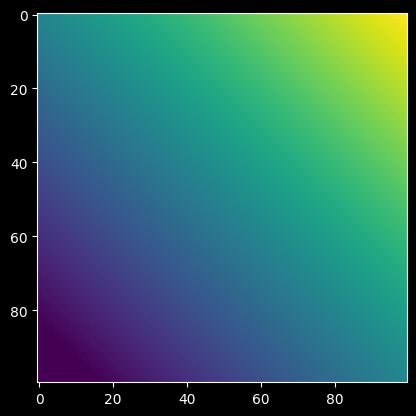

In [404]:
def relu(z): 
    if (z<=0): return 0
    else: return z 
x = np.zeros((100,100))
def f(x1, x2):
    return relu(x1 * -1.2 + x2 * 1.2 + 2)
for i in range(100):
    for j in range(100):
        x[i][j] = f(i*0.01,j*0.01)

fig, ax = plt.subplots()
im = ax.imshow(x)
